<a href="https://colab.research.google.com/github/4nur4g/Time-Series-Analysis/blob/main/3_Working_with_time_series_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing Packages**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

### **Loading and Transforming the data**

In [6]:
data_raw = pd.read_csv('Index2018.csv')

In [7]:
df_copy = data_raw.copy()
df_copy.date = pd.to_datetime(df_copy.date, dayfirst=True)
df_copy.set_index('date', inplace=True)
df_copy = df_copy.asfreq('b')
df_copy = df_copy.fillna(method='ffill')

In [8]:
df_copy.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


### **Removing Surplus Data**

In [9]:
spx = pd.DataFrame(df_copy['spx'])
size = int(len(spx)*0.8)
df, df_test = spx.iloc[:size], spx.iloc[size:]

In [10]:
df.shape, df_test.shape

((5021, 1), (1256, 1))

### **White Noise**
* It is a special type of time series where the data does not follow the pattern it mean it is unpredictable.
* In order to consider series as white noise it has to satisfy following three conditions.
    * Mean should be 0.
    * Variance stays same.
    * No Autocorrelation or zero correlation (There is no clear relationship between past and present values.)
* [White Noise Time Series](https://machinelearningmastery.com/white-noise-time-series-python/#:~:text=A%20time%20series%20is%20white%20noise%20if%20the%20variables%20are,other%20values%20in%20the%20series.)



In [11]:
df.head()

,spx
date,
1994-01-07,469.90
1994-01-10,475.27
1994-01-11,474.13
1994-01-12,474.17
1994-01-13,472.47


In [12]:
wn = np.random.normal(loc=df.spx.mean(), scale=df.spx.std(), size=len(df))

In [13]:
# adding white noise to dataframe
df['wn'] = wn

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
df.describe()

,spx,wn
count,5021.000000,5021.000000
mean,1091.651926,1091.062875
std,292.559287,289.263798
min,438.920000,8.193244
25%,914.620000,899.175029
50%,1144.650000,1086.969818
75%,1316.280729,1289.100925
max,1570.252238,2113.366222


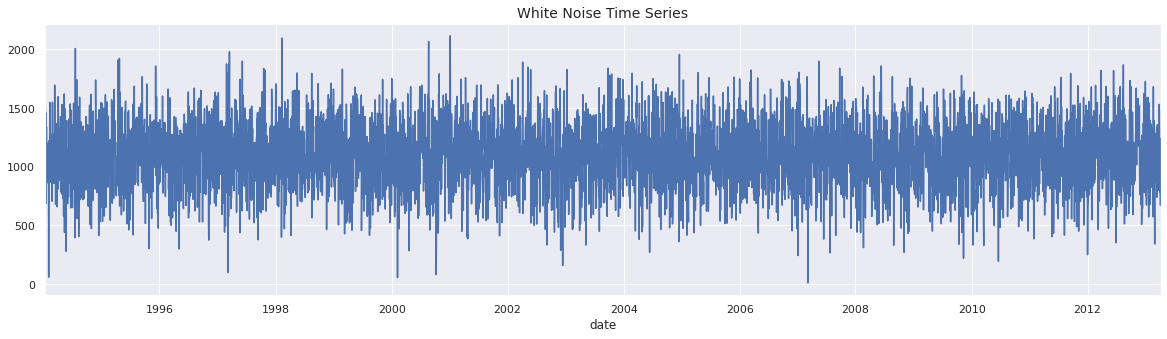

In [15]:
df.wn.plot(figsize=(20,5))
plt.title('White Noise Time Series', size=14)
plt.show()

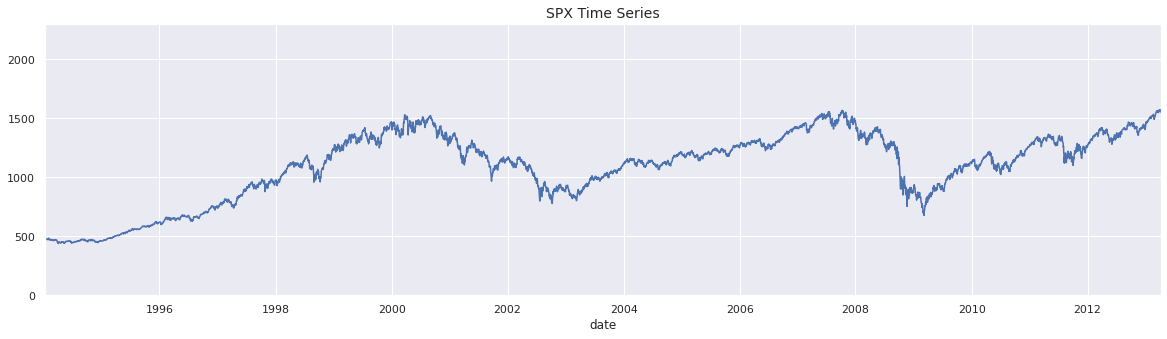

In [16]:
df.spx.plot(figsize=(20,5))
plt.title('SPX Time Series', size=14)
# limit our graph as white noise graph so parameteres can be same
plt.ylim(0, 2300)
plt.show()

* We can see **White Noise Time Series** chart have constant mean and constance variance.
* **SPX Time Series** doesn't have these things.

### **Random Walk**
* A special type of time series where values tends to persist over time and the differences between period is simply white noise.
* [A Gentle Introduction to the Random Walk](https://machinelearningmastery.com/gentle-introduction-random-walk-times-series-forecasting-python/)

In [23]:
rw = pd.read_csv('RandWalk.csv')
rw.date = pd.to_datetime(rw.date, dayfirst=True)
rw.set_index('date', inplace=True)
rw = rw.asfreq('b')

In [24]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [25]:
df['rw'] = rw['price']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
df.head()

,spx,wn,rw
date,,,
1994-01-07,469.90,320.576897,1122.139662
1994-01-10,475.27,1413.826013,1080.347860
1994-01-11,474.13,659.762420,1082.095245
1994-01-12,474.17,1508.251103,1083.639265
1994-01-13,472.47,838.092710,1067.146255


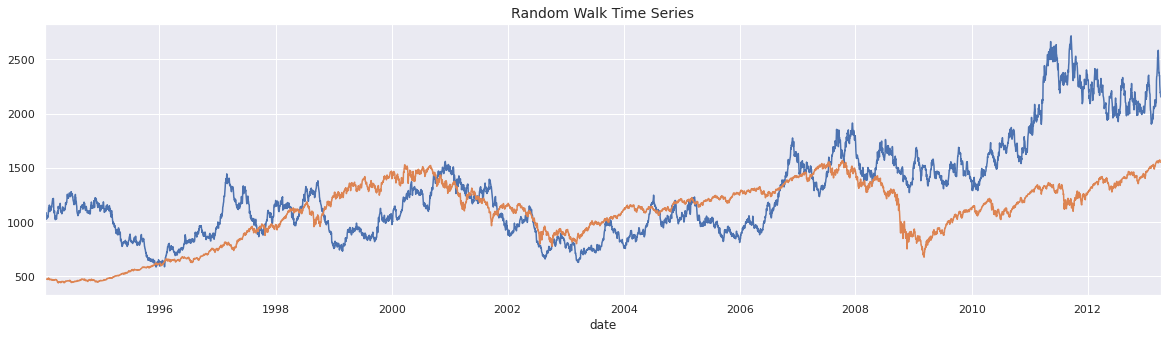

In [28]:
df.rw.plot(figsize=(20,5))
df.spx.plot()
plt.title('Random Walk Time Series', size=14)
plt.show()

* When dataset is random walk the prediction of future market is too tough and if we find the difference it will be white noise.

### **Stationarity**
* [A Gentle Introduction to the Random Walk](https://machinelearningmastery.com/gentle-introduction-random-walk-times-series-forecasting-python/)
* Test Statistic < critical value = Stationary

In [38]:
# using ad fuller method in SPX
result = sts.adfuller(df.spx)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('No. of lags: %f' % result[2])
print('No. of observation used in Analysis: %f' % result[3])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
# the lower the values easier is to make future prediction
print('Maximize Information criteria provided ther is some autocorrelation: %f' % result[5])

ADF Statistic: -1.736985
p-value: 0.412165
No. of lags: 18.000000
No. of observation used in Analysis: 5002.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Maximize Information criteria provided ther is some autocorrelation: 39904.880607


* ADF Stastics > Critical Values = non-stationary
* In p-value 40% chance that not rejecting the null. So, we can't confirm the data is stationary. For stationary data had to very low p-value.

In [37]:
# using ad fuller method
result = sts.adfuller(df.wn)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('No. of lags: %f' % result[2])
print('No. of observation used in Analysis: %f' % result[3])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
# the lower the values easier is to make future prediction
print('Maximize Information criteria provided ther is some autocorrelation: %f' % result[5])

ADF Statistic: -51.942373
p-value: 0.000000
No. of lags: 1.000000
No. of observation used in Analysis: 5019.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Maximize Information criteria provided ther is some autocorrelation: 70687.458163


* We now the white noise is a stationary series.
* ADF Statics < Critical value = stationary.
* It should have very low p value.
* It should have approx no lags.

In [39]:
# using ad fuller method in random walk
result = sts.adfuller(df.rw)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('No. of lags: %f' % result[2])
print('No. of observation used in Analysis: %f' % result[3])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
# the lower the values easier is to make future prediction
print('Maximize Information criteria provided ther is some autocorrelation: %f' % result[5])

ADF Statistic: -1.328607
p-value: 0.615985
No. of lags: 24.000000
No. of observation used in Analysis: 4996.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Maximize Information criteria provided ther is some autocorrelation: 46299.333498


* ADF Statics > Critical value = non-stationary
* p-value is 60% = non-stationary


### **Seasonality**
* There are many approach to test seasonality like Decomposition.
* Decompostion split in 3 effect:
    * Trend : Pattern.
    * Seasonal : Cyclical effect
    * Residual : Error of Prediction
* Simplest Decompostion is Naive Decompostion with this decompostion we except relationship between three parts and the observed time series.Two main approach are.
    * Additive = Seasonal + Trend + Residual
    * Multiplication = Seasonal * Trend * Residiual
* [How to identify and remove seasonality](https://machinelearningmastery.com/time-series-seasonality-with-python/)


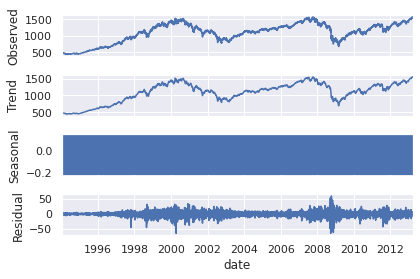

In [50]:
s_dec_additive = seasonal_decompose(df.spx, model='additive')
s_dec_additive.plot()
plt.show()

* Trend resembles the observed because decompostion function uses the previous values as trendsetter.
* Seasonal looks like rectangle when values ossilating up and down and figure size is too small.
* Residuals are the difference between true values and the predictions for any period.
* No Seasonility.

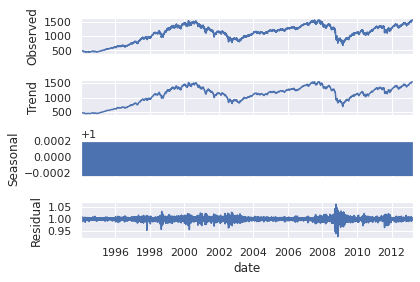

In [52]:
s_dec_multi = seasonal_decompose(df.spx, model='multiplicative')
s_dec_multi.plot()
plt.show()

* Everythin is same so there is no seasonability.

### **Autocorrelation Function (ACF)**

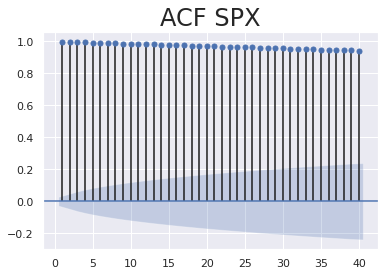

In [53]:
sgt.plot_acf(df.spx, lags=40, zero=False)
plt.title('ACF SPX', size=24)
plt.show()

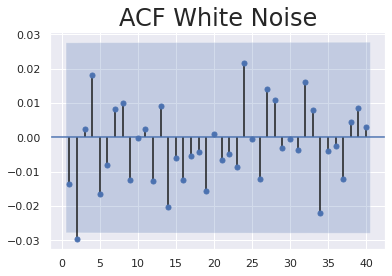

In [55]:
sgt.plot_acf(df.wn, lags=40, zero=False)
plt.title('ACF White Noise', size=24)
plt.show()

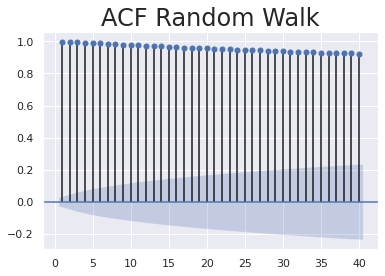

In [59]:
sgt.plot_acf(df.rw, lags=40, zero=False)
plt.title('ACF Random Walk', size=24)
plt.show()

### **Partial Autocorrelation (PACF)**

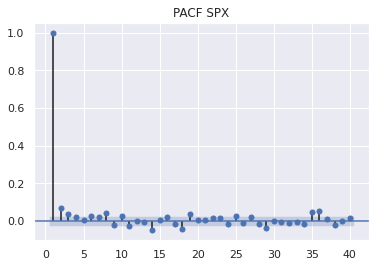

In [57]:
sgt.plot_pacf(df.spx, lags=40, zero=False, method=('ols'))
plt.title('PACF SPX')
plt.show()

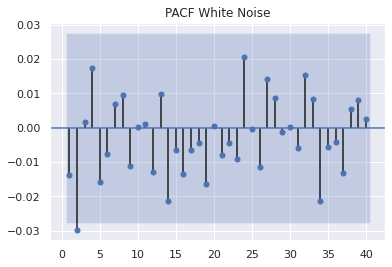

In [58]:
sgt.plot_pacf(df.wn, lags=40, zero=False, method=('ols'))
plt.title('PACF White Noise')
plt.show()

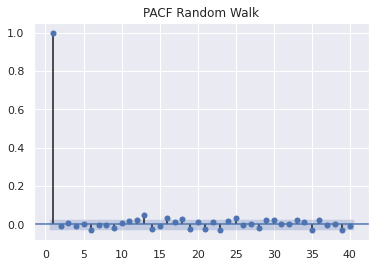

In [60]:
sgt.plot_pacf(df.rw, lags=40, zero=False, method=('ols'))
plt.title('PACF Random Walk')
plt.show()